In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

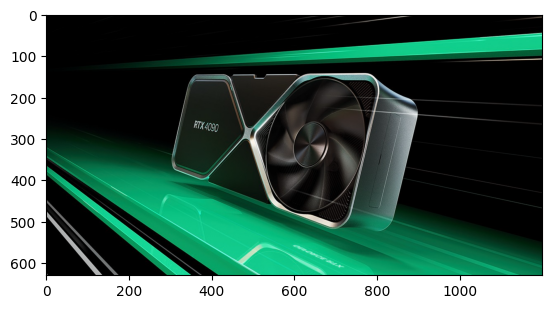

In [49]:
my_img = cv2.imread('im1.jpg')
# cv2_imshow(my_img)
plt.imshow(my_img, cmap="gray")

In [50]:
#RSA
# STEP 1: Generate Two Large Prime Numbers (p,q) randomly
from random import randrange, getrandbits


def power(a,d,n):
  ans=1;
  while d!=0:
    if d%2==1:
      ans=((ans%n)*(a%n))%n
    a=((a%n)*(a%n))%n
    d>>=1
  return ans;


def MillerRabin(N,d):
  a = randrange(2, N - 1)
  x=power(a,d,N);
  if x==1 or x==N-1:
    return True;
  else:
    while(d!=N-1):
      x=((x%N)*(x%N))%N;
      if x==1:
        return False;
      if x==N-1:
        return True;
      d<<=1;
  return False;


def is_prime(N,K):
  if N==3 or N==2:
    return True;
  if N<=1 or N%2==0:
    return False;
  
  #Find d such that d*(2^r)=X-1
  d=N-1
  while d%2!=0:
    d/=2;

  for _ in range(K):
    if not MillerRabin(N,d):
      return False;
  return True;  
  

def generate_prime_candidate(length):
  # generate random bits
  p = getrandbits(length)
  # apply a mask to set MSB and LSB to 1
  # Set MSB to 1 to make sure we have a Number of 1024 bits.
  # Set LSB to 1 to make sure we get a Odd Number.
  p |= (1 << length - 1) | 1
  return p

def generatePrimeNumber(length):
  A=4
  while not is_prime(A, 128):
        A = generate_prime_candidate(length)
  return A

length=5
P=generatePrimeNumber(length)
Q=generatePrimeNumber(length)

print(P)
print(Q)

19
23


In [51]:
#Step 2: Calculate N=P*Q and Euler Totient Function = (P-1)*(Q-1)
N=P*Q
eulerTotient=(P-1)*(Q-1)
print(N)
print(eulerTotient)

437
396


In [52]:
#Step 3: Find E such that GCD(E,eulerTotient)=1(i.e., e should be co-prime) such that it satisfies this condition:-  1<E<eulerTotient

def GCD(a,b):
  if a==0:
    return b;
  return GCD(b%a,a)

E=generatePrimeNumber(4)
while GCD(E,eulerTotient)!=1:
  E=generatePrimeNumber(4)
print(E)


13


In [53]:
# Step 4: Find D. 
#For Finding D: It must satisfies this property:-  (D*E)Mod(eulerTotient)=1;
#Now we have two Choices
# 1. That we randomly choose D and check which condition is satisfying above condition.
# 2. For Finding D we can Use Extended Euclidean Algorithm: ax+by=1 i.e., eulerTotient(x)+E(y)=GCD(eulerTotient,e)
#Here, Best approach is to go for option 2.( Extended Euclidean Algorithm.)

def gcdExtended(E,eulerTotient):
  a1,a2,b1,b2,d1,d2=1,0,0,1,eulerTotient,E

  while d2!=1:

    # k
    k=(d1//d2)

    #a
    temp=a2
    a2=a1-(a2*k)
    a1=temp

    #b
    temp=b2
    b2=b1-(b2*k)
    b1=temp

    #d
    temp=d2
    d2=d1-(d2*k)
    d1=temp

    D=b2

  if D>eulerTotient:
    D=D%eulerTotient
  elif D<0:
    D=D+eulerTotient

  return D


In [54]:
D=gcdExtended(E,eulerTotient)
print(D)

row,col=my_img.shape[0],my_img.shape[1]
enc = [[0 for x in range(3000)] for y in range(3000)]


61


In [55]:
#Step 5: Encryption

for i in range(100,600):
  for j in range(100,1000):
    r,g,b=my_img[i,j]
    C1=power(r,E,N)
    C2=power(g,E,N)
    C3=power(b,E,N)
    enc[i][j]=[C1,C2,C3]
    C1=C1%256
    C2=C2%256
    C3=C3%256
    my_img[i,j]=[C1,C2,C3]


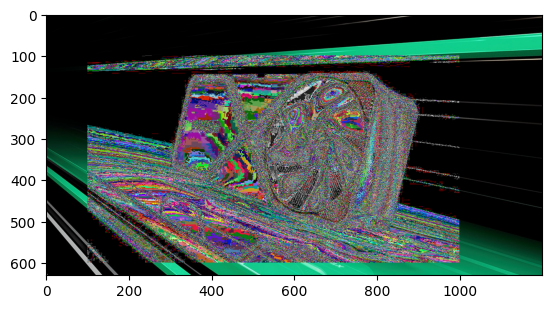

In [56]:
plt.imshow(my_img, cmap="gray")
# cv2_imshow(my_img)

In [57]:
#Step 6: Decryption
for i in range(100,600):
  for j in range(100,1000):
    r,g,b=enc[i][j]
    M1=power(r,D,N)
    M2=power(g,D,N)
    M3=power(b,D,N)
    my_img[i,j]=[M1,M2,M3]

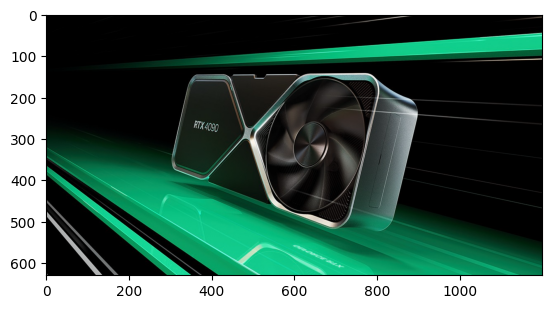

In [58]:
# cv2_imshow(my_img)
plt.imshow(my_img, cmap="gray")